In [2]:
from array import array
import math

In [25]:
ichoice = 1

n = 8000
pi = math.pi
lmbda = 1.0
xlow = -48.0*lmbda
dx = 96.0*lmbda/n
k=2.0*pi/lmbda
delta_k = 0.05*k

x = array('d')
y = array('d')
yf = array('d')

sim_integral = 0.0
theory_integral = 0.0

n_waves = 9

for i in range(0,n):
    x.append(xlow+i*dx+.0000001)
    ys = array('d')
    ysum = 0.0
    for j in range(0,n_waves):
        shift = -1.0+j*2.0/(n_waves-1)
        ys.append(math.sin((k-shift*delta_k)*x[i]))
        ysum = ysum + ys[j]

    ytemp = 1.0/n_waves*math.sqrt(delta_k/math.sqrt(2))*ysum
    y.append(ytemp*ytemp)
    
    yf.append(math.sqrt(2.0/(pi*delta_k))*math.sin(k*x[i])*math.sin(delta_k*x[i])/x[i])
    yf[i]=yf[i]*yf[i]
    
    sim_integral += y[i]*dx
    theory_integral += yf[i]*dx
    
ymax = max(y)
ycrit = ymax/2.0

delta_x_theory = 2.0/delta_k

for i in range(n):
    if (y[i] > ycrit):
        xstart = x[i]
        break
for i in range(n-1,0,-1):
    if (y[i] > ycrit):
        xend = x[i]
        break

print(delta_x_theory,xend-xstart)
    
    
print ("Sim integral = %f" % sim_integral)
print ("Theory integral = %f" % theory_integral)


6.366197723675814 7.560000000000002
Sim integral = 0.997459
Theory integral = 0.979569


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


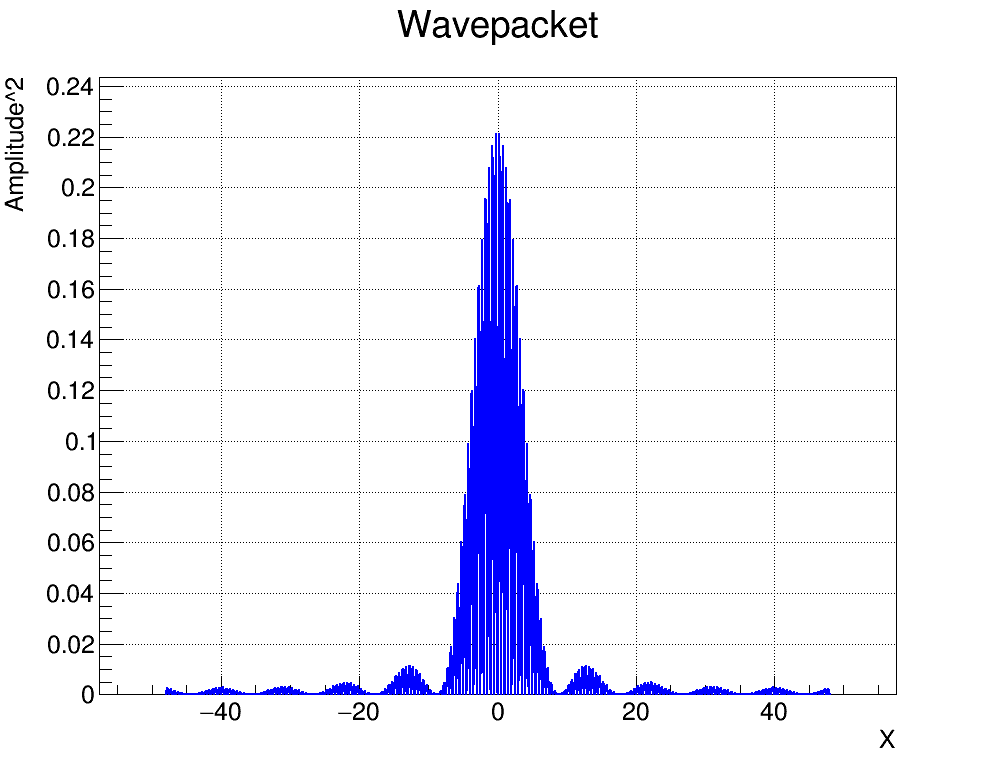

In [26]:
from ROOT import TCanvas
from ROOT import TGraph
from ROOT import gStyle
c1 = TCanvas( 'c1', 'The Main Canvas', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(3,1)

gStyle.SetOptFit(1)
c1.cd()

gr = TGraph(n,x,y)
grf = TGraph(n,x,yf)

gr.SetLineColor(4)
gr.SetLineWidth(2)
grf.SetLineColor(2)
grf.SetLineWidth(2)

gr.SetTitle("Wavepacket")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Amplitude^2")

gr.Draw("AL")
if (ichoice>1):
    grf.Draw("L")
    
c1.Draw()